First 5 rows of the dataset:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 

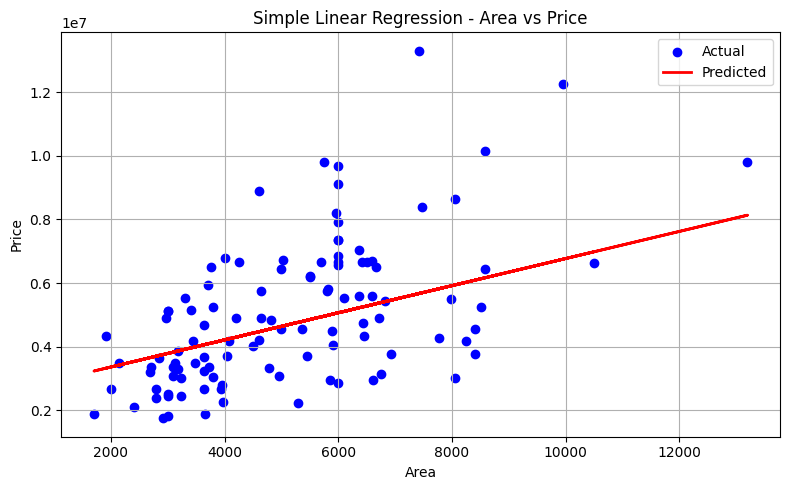


Multiple Linear Regression:
MAE: 1265275.6699454375
MSE: 2750040479309.0513
R² Score: 0.45592991188724474

Model Coefficients:
area: 345.47
bedrooms: 360197.65
bathrooms: 1422319.66
Intercept: 59485.37920871563


In [1]:
# linear_regression_task.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Load Dataset
data = pd.read_csv("E:/t3/Housing.csv")  # make sure to place your dataset in the same folder
print("First 5 rows of the dataset:\n", data.head())

# 2. Data Preprocessing
print("\nDataset Info:")
print(data.info())

# Handle missing values
data = data.dropna()

# Select features and target
# Choose appropriate numerical features based on correlation
correlation = data.corr()
print("\nCorrelation with target variable:\n", correlation['price'].sort_values(ascending=False))

# Simple Linear Regression: one feature
X_simple = data[['area']]  # you can replace 'area' with any numeric feature
y = data['price']

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Predict
y_pred_s = model_simple.predict(X_test_s)

# Evaluate
print("\nSimple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression - Area vs Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('simple_regression_plot.png')
plt.show()

# Multiple Linear Regression
# Use relevant features based on correlation
features = ['area', 'bedrooms', 'bathrooms']  # adjust based on dataset
X_multi = data[features]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

y_pred_m = model_multi.predict(X_test_m)

# Evaluate
print("\nMultiple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))

# Coefficients
print("\nModel Coefficients:")
for feat, coef in zip(features, model_multi.coef_):
    print(f"{feat}: {coef:.2f}")

print("Intercept:", model_multi.intercept_)
